<a href="https://colab.research.google.com/github/alphazx286/Data3B-DataPreprocessing/blob/master/Malware_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarys and Variables**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file1 = r'/content/drive/MyDrive/Colab Notebooks/Files/malwareData/train.csv'

#**Diccionary of data types**

In [4]:
#creando un diccionario de palabras y sus tipos de datos que se utilizaran
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

# **Data Analysis**

In [5]:
#pasar los datos de manera mas ordenada y legible en columnas definidas previamente.
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

retained_columns = numerical_columns + categorical_columns
train = pd.read_csv(file1,usecols = retained_columns,dtype = dtypes)

In [6]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

In [7]:
train.shape

(8921483, 83)

#**Target**

In [8]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.0,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,6169965.0,8921270.0,8.921483e+06,8.921483e+06,8.921483e+06,8885439.0,8.921483e+06,8.383724e+06,8862589.0,8830133.0,8.910645e+06,8826005.0,8.819250e+06,8880177.0,8880170.0,8880140.0,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8874497.0,8874497.0,8.652728e+06,8.921483e+06,8.921483e+06,8861399.0,8.921483e+06,8.921483e+06,1.512724e+06,8.760960e+06,3.254158e+06,8738226.0,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,NaN,4.948320e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.049152e+04,NaN,NaN,2.790453e+01,1.571997e+04,5.751534e+02,NaN,2.891896e-05,4.649162e-04,NaN,NaN,1.216142e+01,NaN,2.378578e+05,NaN,NaN,NaN,2.912138e+06,3.823069e+05,7.718728e-02,6.109390e+03,NaN,NaN,NaN,1.123782e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,1.388788e-05,1.007318e-05,2.508163e-04,NaN,3.268055e+04,4.860229e-01,2.980232e-07,7.202148e-03,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,NaN,1.379994e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.873461e+04,0.0,NaN,6.560791e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,2.104187e-02,NaN,0.0,9.867765e+03,NaN,7.148446e+04,0.0,0.0,NaN,4.451633e+09,3.233614e+05,2.668884e-01,4.971148e+03,0.000000e+00,NaN,NaN,1.933305e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,3.726959e-03,3.173828e-03,1.582336e-02,NaN,2.112612e+04,4.998046e-01,5.459785e-04,8.453369e-02,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.0,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,1.0,1.0,-1.280000e+02,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,1.0,1.000000e+00,1.0,1.0,2.0,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.001953e-01,-1.0,-1.0,0.000000e+00,7.600000e+03,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.0,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,18.0,89.0,-2.900000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.000000e+00,111.0,1.0,1.000000e+00,1443.0,1.896920e+05,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000e+00,4.096000e+03,1.389844e+01,1366.0,768.0,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,142.0,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e

In [9]:
#leer los datos que se encuentran en valores binarios a enteros o flotantes
for column in train.select_dtypes(include=['float','int']):
    if train[column].min() == 0 and train[column].max() == 1 :
        print(column)


In [10]:
#los valores que encuentre nulos los va adjuntar a array para poder contabilizarlos
nans = []
pcts = []
for cols in train:
    nans.append(train[cols].isnull().sum())
    pcts.append(train[cols].isnull().sum()/train.shape[0]*100)

In [11]:
missing_data = pd.DataFrame({"Col":train.columns,"Missing values": nans, "Pct missing [%]": pcts}).sort_values("Missing values", ascending=False)
missing_data[missing_data["Missing values"]!=0].reset_index(drop=True)

,Col,Missing values,Pct missing [%]
0,PuaMode,8919174,99.974119
1,Census_ProcessorClass,8884852,99.589407
2,DefaultBrowsersIdentifier,8488045,95.141637
3,Census_IsFlightingInternal,7408759,83.044030
4,Census_InternalBatteryType,6338429,71.046809
5,Census_ThresholdOptIn,5667325,63.524472
6,Census_IsWIMBootEnabled,5659703,63.439038
7,SmartScreen,3177011,35.610795
8,OrganizationIdentifier,2751518,30.841487
9,SMode,537759,6.027686


There are:
74 columns without missing values
35 columns with less than 10% of missing values
 2 columns withmissing values between 10% and 50%
 7 columns with more than 50% of missing values


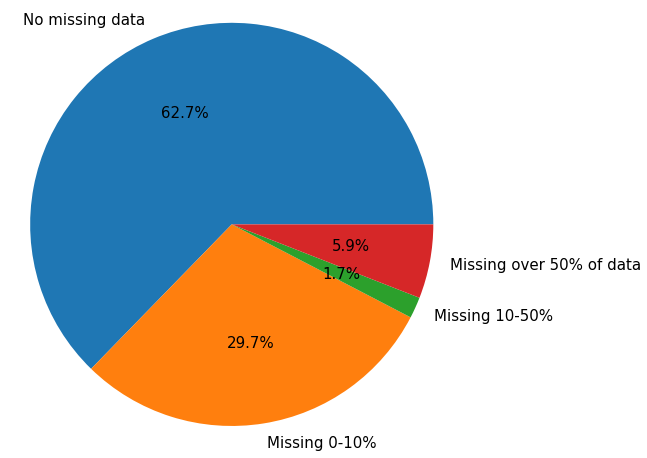

In [12]:
complete = (missing_data["Pct missing [%]"]<=10).sum()
a = ((missing_data["Pct missing [%]"]!=0) & (missing_data["Pct missing [%]"]<=10)).sum()
b = ((missing_data["Pct missing [%]"]>10) & (missing_data["Pct missing [%]"]<=50)).sum()
c = (missing_data["Pct missing [%]"]>50).sum()
print("There are:\n{} columns without missing values\n{} columns with less than 10% of missing values\n {} columns withmissing values between 10% and 50%\n {} columns with more than 50% of missing values".format(complete,a,b,c))

labels =["No missing data", "Missing 0-10%", "Missing 10-50%", "Missing over 50% of data"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([complete,a,b,c],autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

In [13]:
detect_no = (train["HasDetections"]==0).sum()
detect_yes = (train["HasDetections"]==1).sum()

print(detect_no,detect_yes)

4462591 4458892


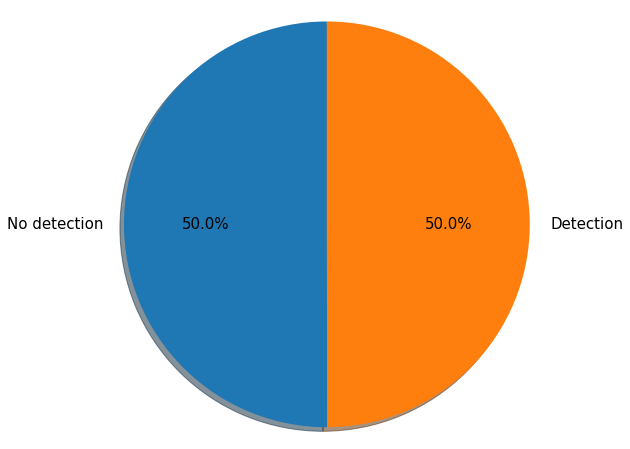

In [14]:
labels = 'No detection', 'Detection',
sizes = [detect_no, detect_yes]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()



#**Function Graphs**

In [15]:
def my_graphs1(col_name, rotation=45, threshold=0.01, explode =-1):
    '''
    Esta función crea dos gráficos: la distribución de las categorías (gráfico de pastel) 
    y la fracción de máquinas infectadas en cada categoría (gráfico de barras).
    '''
    category = train[col_name].unique().tolist()
    totals=[]
    infected=[]
    
    for item in category:
        a = (train[col_name]==item).sum()
        totals.append(a)
        infected.append((train[train[col_name]==item]["HasDetections"]==1).sum()/a)
        
    #creando un dataframe de total y de infectados de infectados
    df = pd.DataFrame({"Total":totals,"Infected": infected}, index=category).sort_values("Total", ascending=False) 
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize=(20,8))
    
    #creando un gráfico circular con la opción de explosión condicional
    threshold = train.shape[0]*threshold

    if explode==-1:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15})
    else:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15}, explode=explode)
    ax[0].axis('equal')
    ax[0].set_title(col_name)
    
    #creó un gráfico de barras clasificado
    df.sort_values("Infected", ascending=False, inplace=True)
    ax[1].set_xticklabels(category,rotation=45, horizontalalignment='right')
    ax[1].set_title('Infected fractions')
    ax[1] = sns.barplot(x=df.index, y="Infected",data=df)
    plt.show()


#**Show The Graphs**

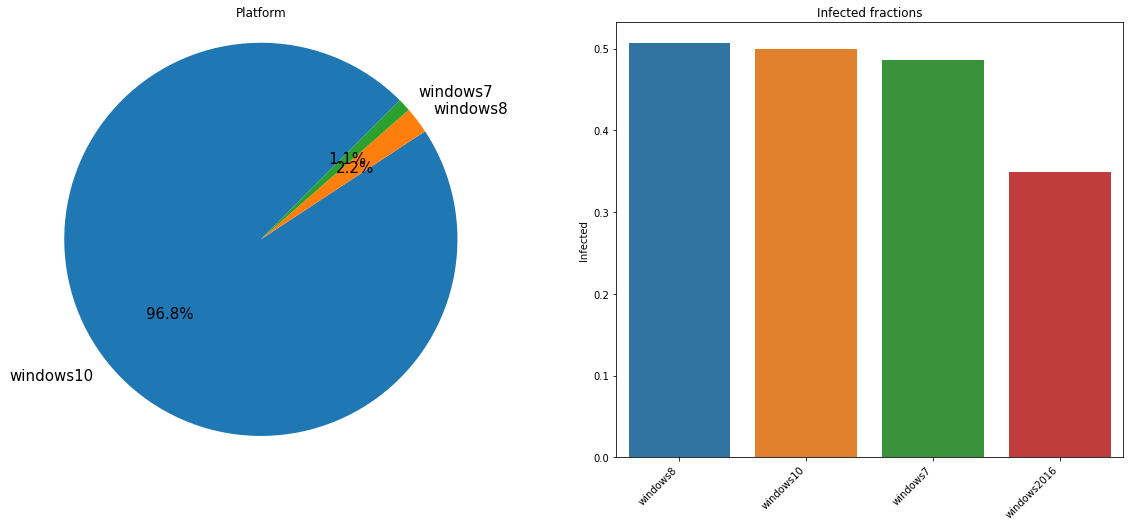

In [16]:
#Muestra la relacion de infecciones en base al SO(Windows 10,8,7,Server2016)
my_graphs1("Platform",45)

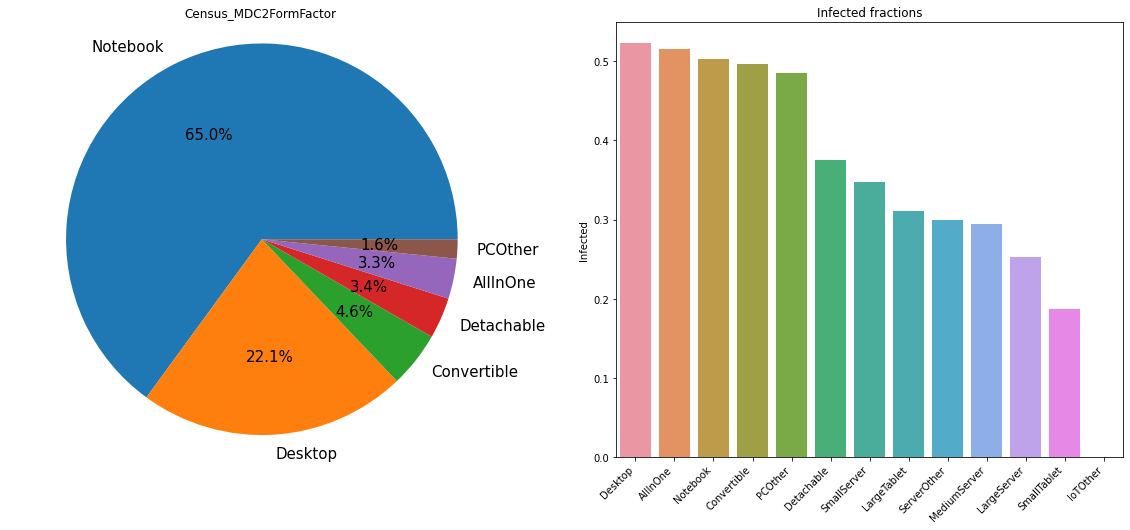

In [17]:
my_graphs1("Census_MDC2FormFactor",0)

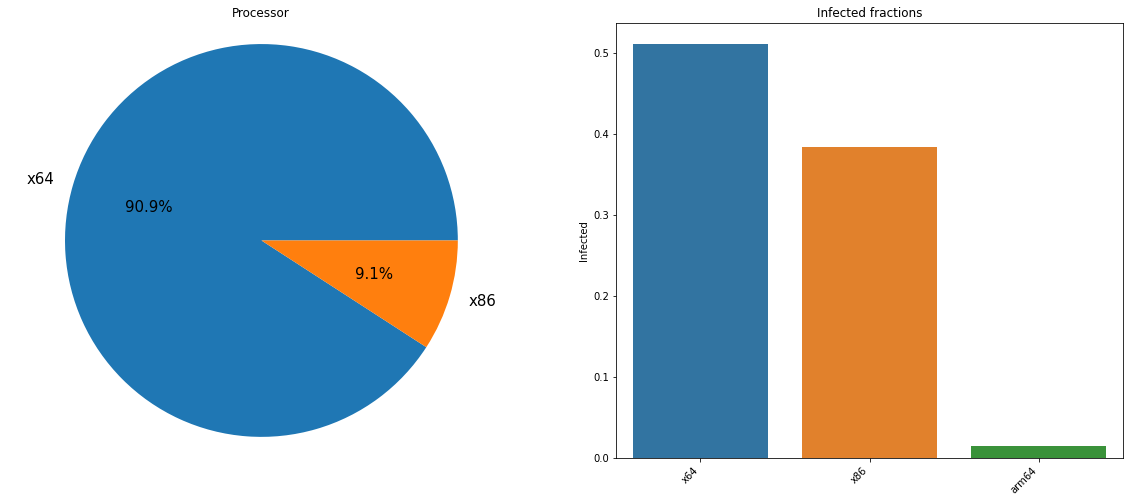

In [18]:
my_graphs1('Processor',0)

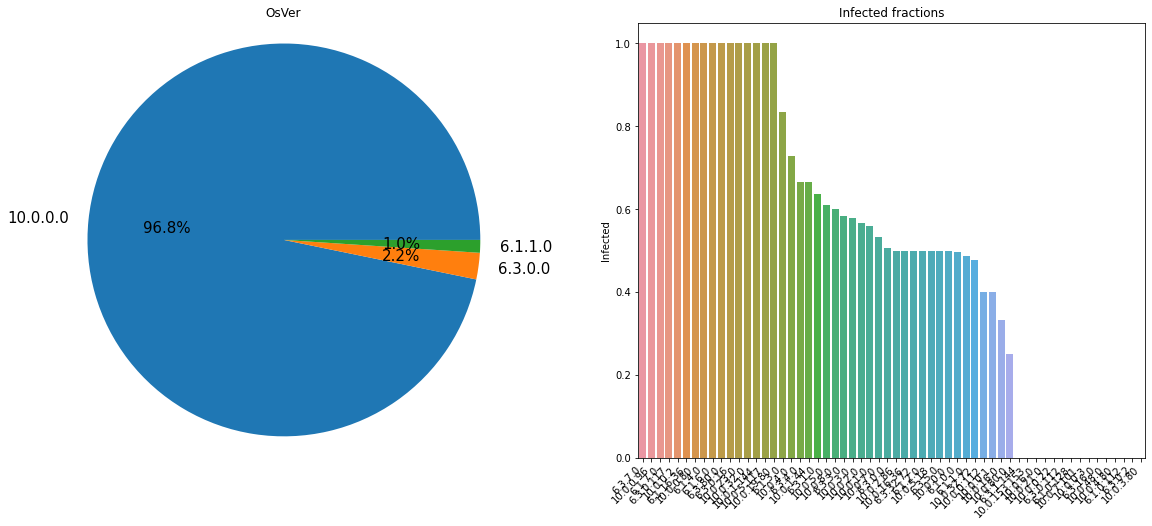

In [19]:
my_graphs1('OsVer',0)

Number of country identifiers: 222
The most frequent country identifier: 43


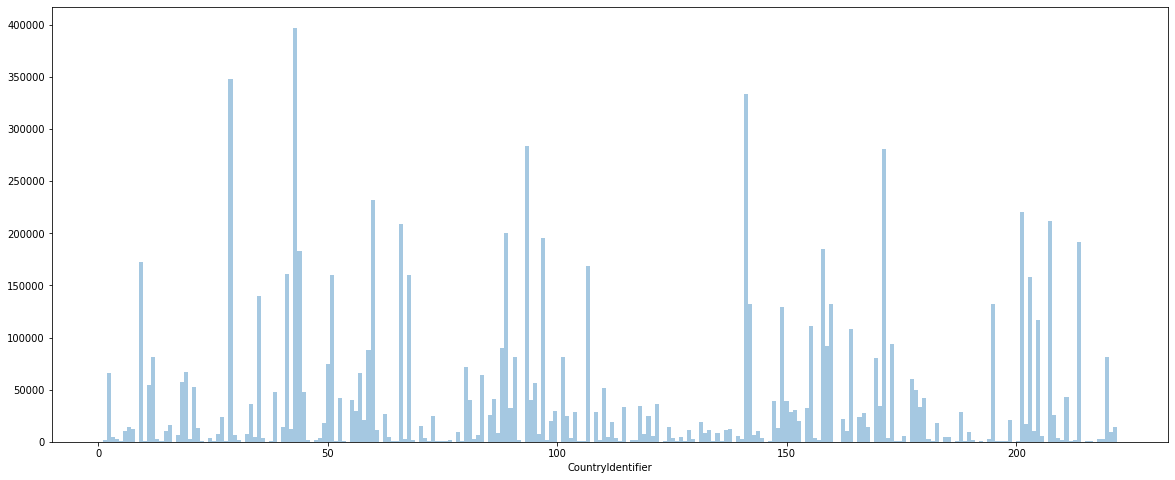

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(20,8))
ax = sns.distplot(train["CountryIdentifier"], kde=False, bins=250)

print("Number of country identifiers: " + str(train["CountryIdentifier"].nunique()))
print("The most frequent country identifier: " + str(train["CountryIdentifier"].mode()[0]))

#**Introduction**

**Microsoft Malware Prediction 2015**

Can you predict if a machine will soon be hit with malware?


The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.

With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security.

As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

Can you help protect more than one billion machines from damage BEFORE it happens?

Columns

Unavailable or self-documenting column names are marked with an "NA".

    MachineIdentifier - Individual machine ID
    ProductName - Defender state information e.g. win8defender
    EngineVersion - Defender state information e.g. 1.1.12603.0
    AppVersion - Defender state information e.g. 4.9.10586.0
    AvSigVersion - Defender state information e.g. 1.217.1014.0
    IsBeta - Defender state information e.g. false
    RtpStateBitfield - NA
    IsSxsPassiveMode - NA
    DefaultBrowsersIdentifier - ID for the machine's default browser
    AVProductStatesIdentifier - ID for the specific configuration of a user's antivirus software
    AVProductsInstalled - NA
    AVProductsEnabled - NA
    HasTpm - True if machine has tpm
    CountryIdentifier - ID for the country the machine is located in
    CityIdentifier - ID for the city the machine is located in
    OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
    GeoNameIdentifier - ID for the geographic region a machine is located in
    LocaleEnglishNameIdentifier - English name of Locale ID of the current user
    Platform - Calculates platform name (of OS related properties and processor property)
    Processor - This is the process architecture of the installed operating system
    OsVer - Version of the current operating system
    OsBuild - Build of the current operating system
    OsSuite - Product suite mask for the current operating system.
    OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
    OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
    SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.
    IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
    AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+
    PuaMode - Pua Enabled mode from the service
    SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed
    IeVerIdentifier - NA
    SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.
    Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
    UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
    Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)
    Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone
    Census_OEMNameIdentifier - NA
    Census_OEMModelIdentifier - NA
    Census_ProcessorCoreCount - Number of logical cores in the processor
    Census_ProcessorManufacturerIdentifier - NA
    Census_ProcessorModelIdentifier - NA
    Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated
    Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB
    Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD
    Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB
    Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)
    Census_TotalPhysicalRAM - Retrieves the physical RAM in MB
    Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx
    Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display
    Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.
    Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display
    Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device
    Census_InternalBatteryType - NA
    Census_InternalBatteryNumberOfCharges - NA
    Census_OSVersion - Numeric OS version Example - 10.0.10130.0
    Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
    Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
    Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
    Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
    Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
    Census_OSSkuName - OS edition friendly name (currently Windows only)
    Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean
    Census_OSInstallLanguageIdentifier - NA
    Census_OSUILocaleIdentifier - NA
    Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.
    Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
    Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine
    Census_ActivationChannel - Retail license key or Volume license key for a machine.
    Census_IsFlightingInternal - NA
    Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.
    Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
    Census_ThresholdOptIn - NA
    Census_FirmwareManufacturerIdentifier - NA
    Census_FirmwareVersionIdentifier - NA
    Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.
    Census_IsWIMBootEnabled - NA
    Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)
    Census_IsTouchEnabled - Is this a touch device ?
    Census_IsPenCapable - Is the device capable of pen input ?
    Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
    Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.
    Wdft_RegionIdentifier - NA


#**Bibliography**

https://www.kaggle.com/c/microsoft-malware-prediction

https://www.iso.org/obp/ui/#search

https://github.com/ocatak/malware_api_class/tree/master/other/data

https://www.kaggle.com/c/malware-classification